In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# para hacer calculos estadisticos
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Para empezar esta actividad, realizamos los mismos pasos que en la actividad 3 para crear nuestro DataFrame con la informaciòn de la estaciòn meteorologìca.
#Creamos nuestro DataFrame inicial leyendo el archivo de datos desde el repositoria de github.
url = "https://raw.githubusercontent.com/OscarAngul0/FisicaComputacional1/master/Actividad1/25015.txt"
#CREAMOS NUESTRO DATA FRAME
my_col = ["Fecha","Precip","Evap","T_Max","T_min"]
df_data = pd.read_csv(url, names=my_col, encoding="cp1251", sep="\s+", header=None, skiprows=19, skipfooter=1, engine="python")
#url es la direccion del archivo, names nos da nombres a las columnas, enncoding le dice a python que el archivo tienes caracteres en español. sep es el formato de separacion de datos. header son comentarios al principio del archivo
#verificamos que el dataframe se haya creado correctamente
#print (df_data.head(), df_data.tail())
str_Nulo = 'Nulo'
df_data1 = df_data.replace(to_replace=str_Nulo, value='', regex=True)
#convertimos la informacion a numeros flotantes
cols1 = ['Precip', 'Evap', 'T_Max', 'T_min']
for cols in cols1:
  df_data1[cols] = pd.to_numeric(df_data1[cols], errors='coerce')
  #verificamos cuantos datos nulos hay
df_data1.isnull().sum() 
#vemos que casi no faltan datos en relacion al numero de dias donde tenemos mediciones
#hacemos estadistica
df_data1.describe()
#trabajamos la columa de las fechas
df_data2=df_data1.copy()
df_data2["Fecha"] = pd.to_datetime(df_data2["Fecha"], dayfirst=True)
 #print (df_data2.head())
df_data2.dtypes
#Agregamos 2 nuevas columnas poara denotar el año y el mes, esto se hace para facilitar el filtrado de informacion +adelante
df_data2["Año"]=df_data2["Fecha"].dt.year
df_data2["Mes"]=df_data2["Fecha"].dt.month
# Eliminaremos la columna de Mes (numérico) y crearemos una nueva de Mes en unavariable de tipo caracter
df_data2.drop('Mes', axis=1, inplace=True) #inplace=true hace que los cambios en esa columnna se hagan directamente sobre el dataframe original.
df_data2['Mes'] = df_data2['Fecha'].dt.strftime('%b')
print (df_data2.info())
print (df_data2.head(), df_data2.tail())
print (df_data2.dtypes)
#Nos aseguramos que el data frame, contenga los datos del tipo correcto
print (df_data2.shape)
print (df_data2.describe)
print (df_data2.isnull().sum() )
#Obtenemos la informacion general de nuestro DataFrame, asi completando lo necesario para comenzar con el analisis exploratorio de datos 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21266 entries, 0 to 21265
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   21266 non-null  datetime64[ns]
 1   Precip  21237 non-null  float64       
 2   Evap    20900 non-null  float64       
 3   T_Max   21190 non-null  float64       
 4   T_min   21179 non-null  float64       
 5   Año     21266 non-null  int64         
 6   Mes     21266 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.1+ MB
None
       Fecha  Precip  Evap  T_Max  T_min   Año  Mes
0 1961-01-01     0.0   2.9   22.0   10.5  1961  Jan
1 1961-01-02     0.0   2.7   25.0    9.0  1961  Jan
2 1961-01-03     0.0   3.7   29.0   10.0  1961  Jan
3 1961-01-04     0.0   2.5   22.0   13.0  1961  Jan
4 1961-01-05     0.0   1.1   24.0   14.0  1961  Jan            Fecha  Precip  Evap  T_Max  T_min   Año  Mes
21261 2019-04-26     0.0   6.9   36.0   16

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21266 entries, 1961-01-01 to 2019-04-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  21237 non-null  float64
 1   Evap    20900 non-null  float64
 2   T_Max   21190 non-null  float64
 3   T_min   21179 non-null  float64
 4   Año     21266 non-null  int64  
 5   Mes     21266 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10592 entries, 1961-01-01 to 1989-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Precip  10566 non-null  float64
 1   Evap    10509 non-null  float64
 2   T_Max   10533 non-null  float64
 3   T_min   10522 non-null  float64
 4   Año     10592 non-null  int64  
 5   Mes     10592 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 579.2+ KB
None
<class 'pandas.core.frame.D

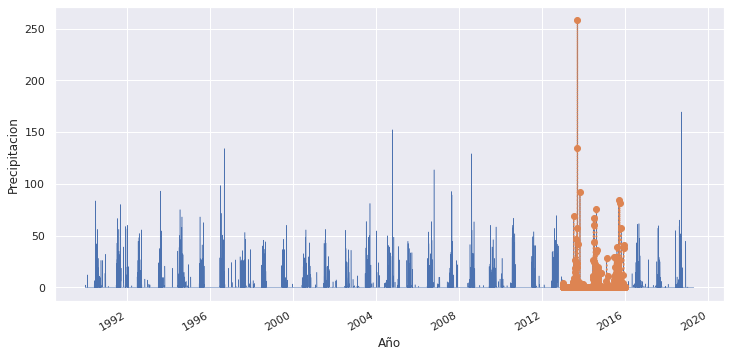

In [ ]:
#HACEMOS NUESTRA SERIE DE TIEMPO
df_datas=df_data2.copy
df_datas=df_data2.set_index("Fecha")
#confirmamos 
df_datas.info()
#seleccionamos nuestros conjuntos de datos
df_60 = df_datas[(df_datas["Año"]>=1960) & (df_datas["Año"]<1990)]
df_90=df_datas[(df_datas["Año"]>=1990)&(df_datas["Año"]<2020)]
#verificamos que el conjunto este correcto
print (df_60.info())
print (df_90.info())
#para ver los datos superficialmente graficamos la precipitacion de un conjunto
sns.set(rc={'figure.figsize':(12, 6)})
df_90['Precip'].plot(linewidth=0.5);
#verificando un año especifico o un periodo de datos, resaltamos este señalando en el objeto ax dicho periodo
ax = df_90.loc["2013":"2015","Precip"].plot(marker='o', linestyle='dotted')
ax.set_ylabel("Precipitacion");
ax.set_xlabel("Año") ;


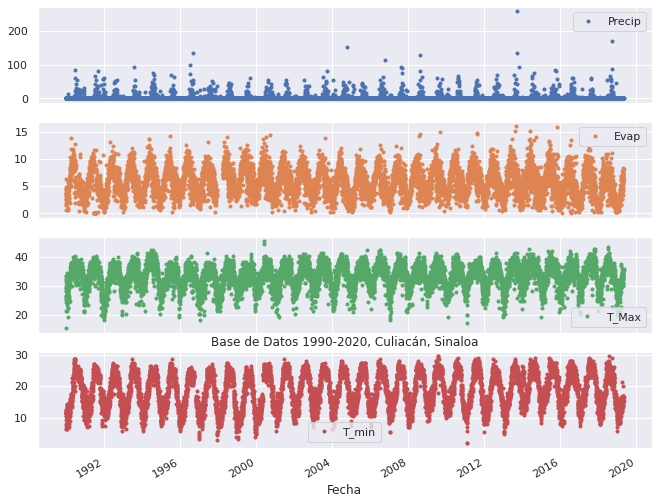

In [ ]:
#ACTIVIDAD 1
#GRAFICAMOS TODO NUESTRO RANGO DE DATOS
cols_plot = ['Precip', 'Evap', 'T_Max', 'T_min']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']

axes = df_90[cols_plot].plot(marker='.', alpha=1, linestyle='None', 
                                  figsize=(11, 9), subplots=True)
plt.title('Base de Datos 1990-2020, Culiacán, Sinaloa');


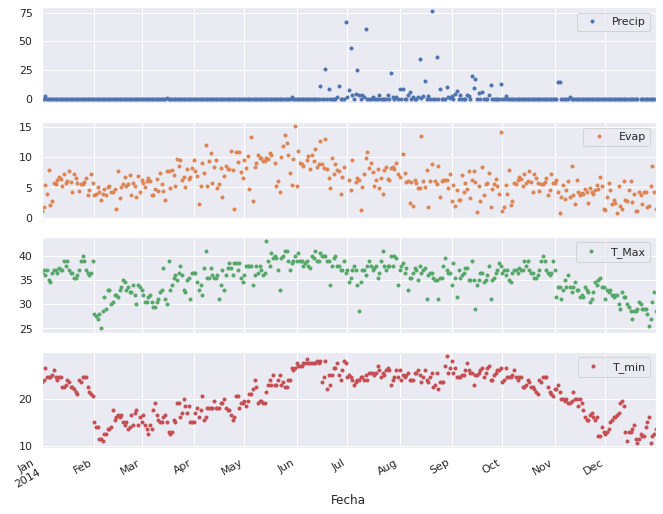

In [ ]:
#ACTIVIDAD 1
#ANALIZAMOS EL AÑO 2014
start, end = "2014-01", "2014-12"
df_2014 = df_90.loc[start:end].copy()        
df_2014.head()
cols_plot = ['Precip', 'Evap', 'T_Max', 'T_min']
ax_ylabels = ['Precip (mm)', 'Evap (mm)', 'Tmax ºC', 'Tmin (ºC)']

axes = df_2014[cols_plot].plot(marker='.', alpha=1, linestyle='None', 
                                  figsize=(11, 9), subplots=True)



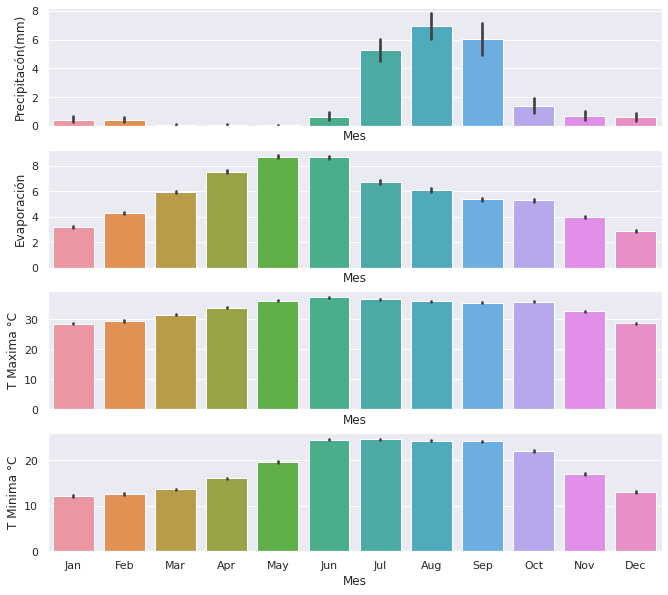

In [ ]:
#ACTIVIDAD 1
#graficamos la estacionalidad de nuestros datos, usando una grafica de barras
fig, axes = plt.subplots(4, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(["Precip", "Evap",'T_Max', 'T_min'], axes):
  sns.barplot(data=df_90, x='Mes', y=name, ax=ax)
  if name=="Precip":
   ax.set_ylabel("Precipitacón(mm)")
  elif name=="Evap":
    ax.set_ylabel("Evaporación")
  elif name=="T_Max":
    ax.set_ylabel("T Maxima °C") 
  else:
    ax.set_ylabel("T Minima °C")


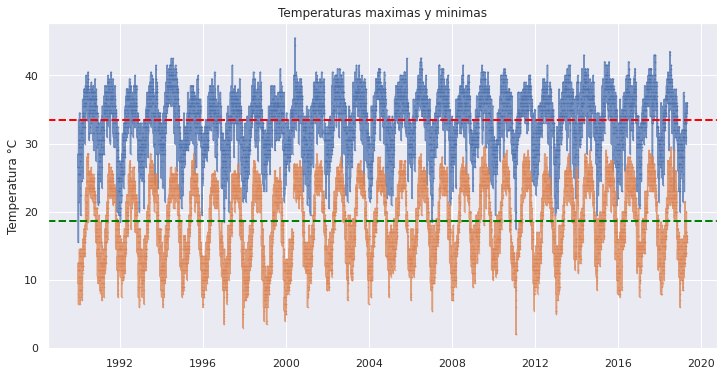

In [ ]:
#ACTIVIDAD 2
#graficamos todo el rango de datos de la temperatura maxima y minima
start, end = "1990-01","2020-01"  
fig, ax=plt.subplots()
for x in ["T_Max", "T_min"]:
  ax.plot(df_90.loc[start:end, x], marker=".", markersize=1, linestyle="-", alpha=0.75, label=x)
    #AGREGAMOS UNA LINEA PUNTEADA QUE DENOTE EL PROMEDIO
  if x=="T_Max":
    plt.axhline(df_90.loc[start:end,x].mean(), color="red", linestyle="--",linewidth=2, label="Promedio")
  else:
    plt.axhline(df_90.loc[start:end,x].mean(), color="green", linestyle="--",linewidth=2, label="Promedio")
  ax.legend 
  ax.set_ylabel("Temperatura °C")
  ax.set_title("Temperaturas maximas y minimas")


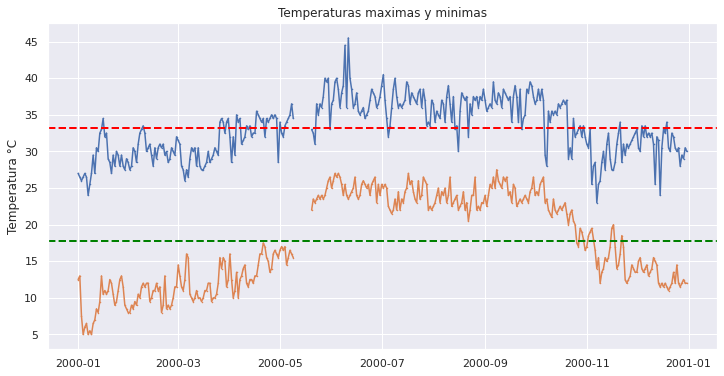

In [ ]:
#ACTIVIDAD 2
#ANALIZAREMOS LAS TEMPERATURAS MAXIMAS Y MINIMAS DEL AÑO 2000
start, end = "2000-01","2000-12"  
fig, ax=plt.subplots()
for x in ["T_Max", "T_min"]:
  ax.plot(df_90.loc[start:end, x], marker="*", markersize=1, linestyle="-", alpha=1, label=x)
     #AGREGAMOS UNA LINEA PUNTEADA QUE DENOTE EL PROMEDIO
  if x=="T_Max":
    plt.axhline(df_90.loc[start:end,x].mean(), color="red", linestyle="--",linewidth=2, label="Promedio")
  else:
    plt.axhline(df_90.loc[start:end,x].mean(), color="green", linestyle="--",linewidth=2, label="Promedio")
  ax.legend 
  ax.set_ylabel("Temperatura °C")
  ax.set_title("Temperaturas maximas y minimas")
  #PODEMOS NOTAR QUE FALTAN DATOS DE MAYO entre el dia 10 y 19 de dicho mes
 #print(df_90.loc["2000-05-01":"2000-05-20"])

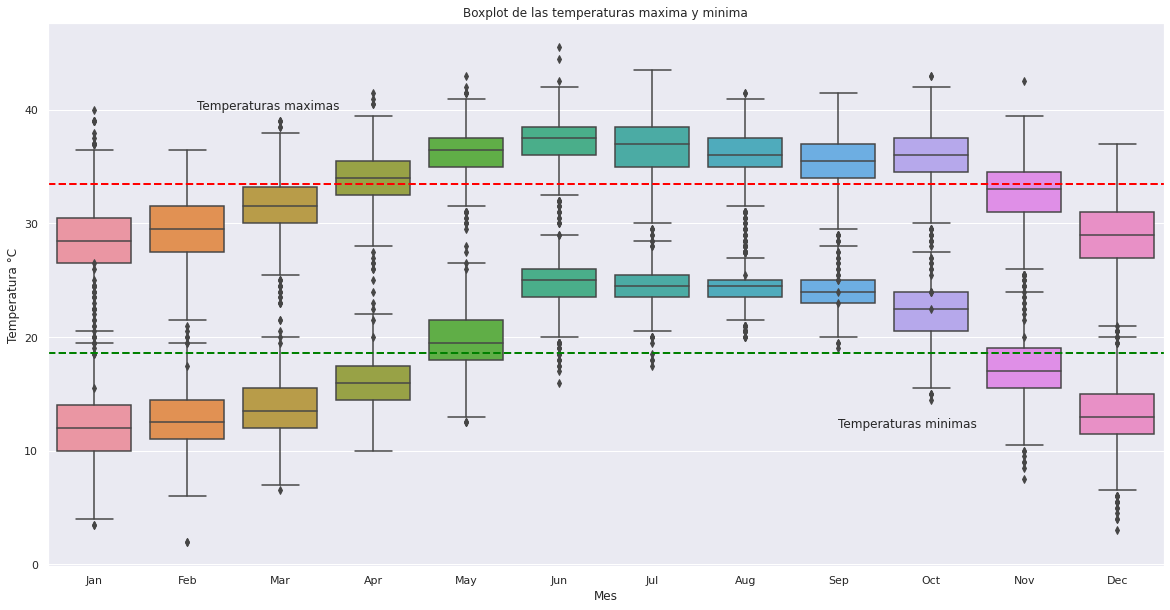

In [ ]:
#ACTIVIDAD 2 
#graficamos la estacionalidad de nuestros datos, filtrandolos por mes y usando una boxplot
fig, ax=plt.subplots(figsize=(20,10))
start, end = "1990-01","2020-01"  
for x in ["T_Max", "T_min"]:
  sns.boxplot(data=df_90, x="Mes", y=x, ax=ax)
  if x=="T_Max":
   plt.axhline(df_90.loc[start:end,x].mean(), color="red",  linestyle="--", linewidth=2) 
  else:
   plt.axhline(df_90.loc[start:end,x].mean(), color="green",  linestyle="--",linewidth=2,)
   ax.set_ylabel("Temperatura °C")
   ax.set_title("Boxplot de las temperaturas maxima y minima")
   plt.text(1.1,40, "Temperaturas maximas")
   plt.text(8,12, "Temperaturas minimas")


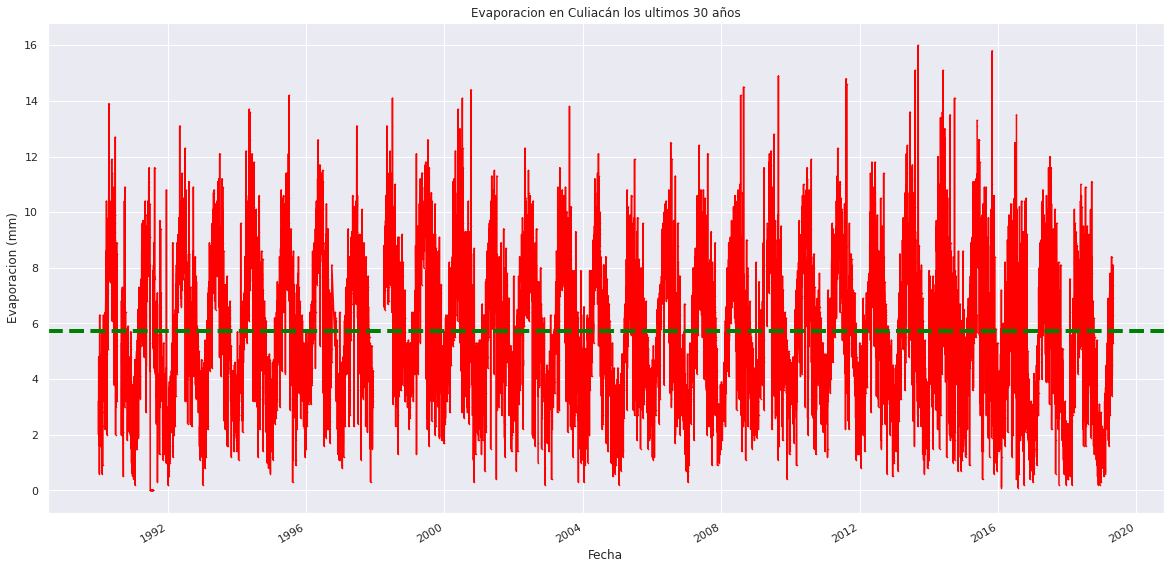

In [ ]:
#ACTIVIDAD 3 
#graficamos todo el rango de datos de la evaporacion
start, end = "1990-01", "2020-01"
plt.title("Evaporacion en Culiacán los ultimos 30 años")
plt.ylabel("Evaporacion (mm)")
axes= df_90.loc[start:end, "Evap"].plot(figsize=(20,10), marker="*", markersize=1, linestyle="-",  alpha=1, color="red")
plt.axhline(df_90.loc[start:end, "Evap"].mean(), color="green", linestyle="--", linewidth=4)
#podemos ver que faltan algunos datos de la evaporacion en el año 1998
#plt.text(0.5,0.5, "Promedio")


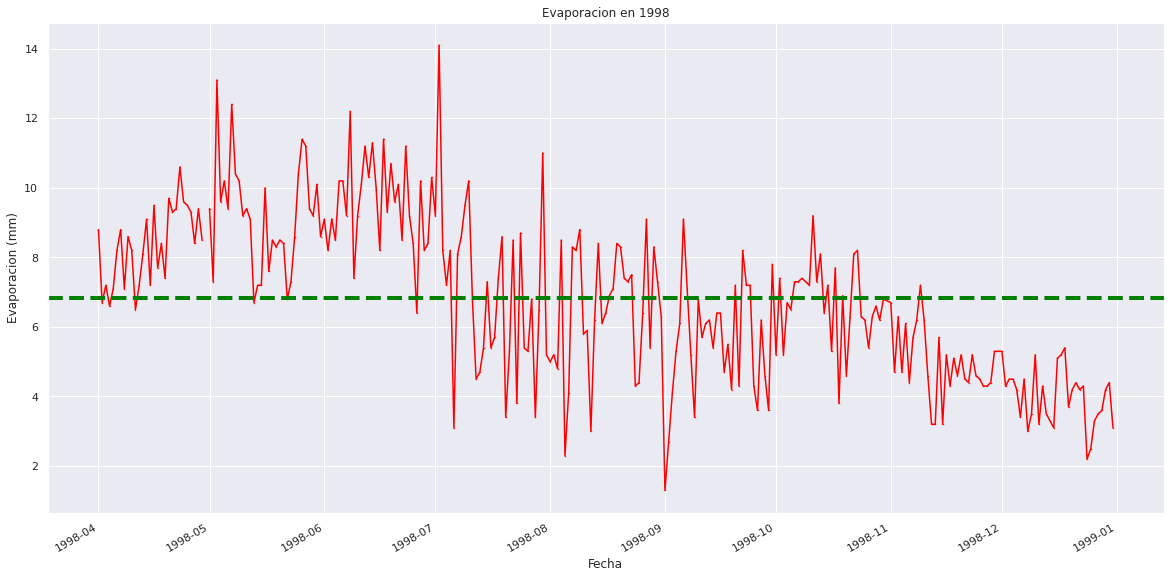

In [ ]:
#ACTIVIDAD 3
#analizamos los datos de evaporacion para 1998
start, end = "1998-01","1998-12"
plt.title("Evaporacion en 1998")
plt.ylabel("Evaporacion (mm)")
axes= df_90.loc[start:end, "Evap"].plot(figsize=(20,10), marker=".", markersize=1, linestyle="-", alpha=1, color="red")
plt.axhline(df_90.loc[start:end, "Evap"].mean(), color="green", linestyle="--", linewidth=4)
#Podemos confirmar que hacen falta datos de los primeros meses de 1998


Text(0.5, 1.0, 'Estacionalidad de la evaporación en Culiacán')

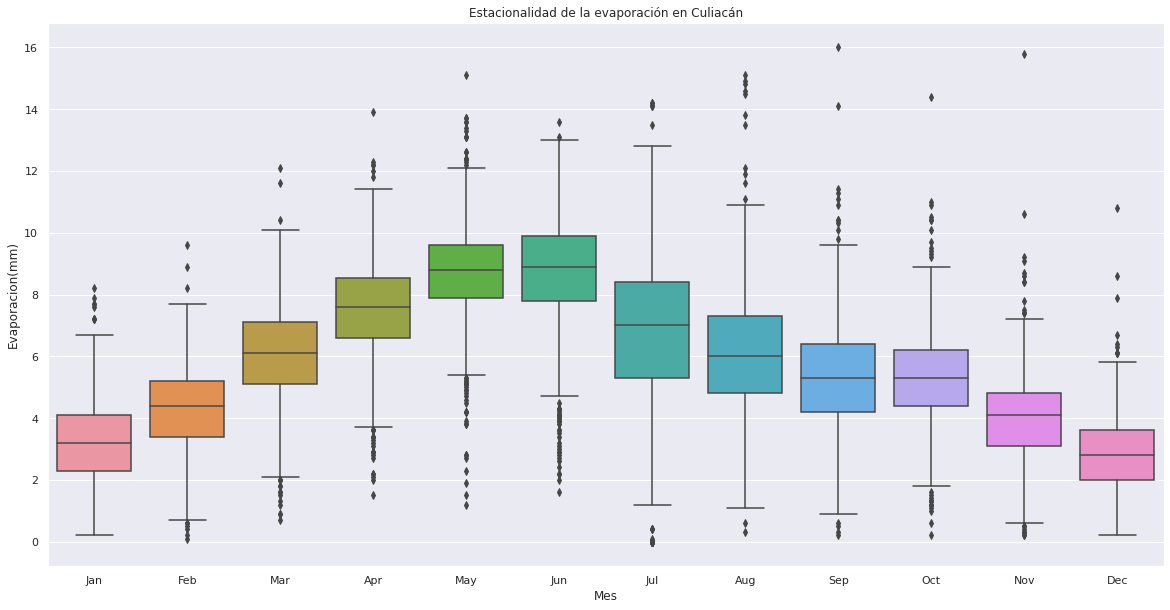

In [ ]:
#ACTIVIDAD 3
#Graficamos la estacionalidad de la evaporacion usando boxplot
fig, ax=plt.subplots(figsize=(20,10))
sns.boxplot(data=df_90, x="Mes", y="Evap")
ax.set_ylabel("Evaporacion(mm)")
ax.set_title("Estacionalidad de la evaporación en Culiacán")
#podemos ver muchos datos fuera de la media


Text(9420, 10, 'Temperatura minima')

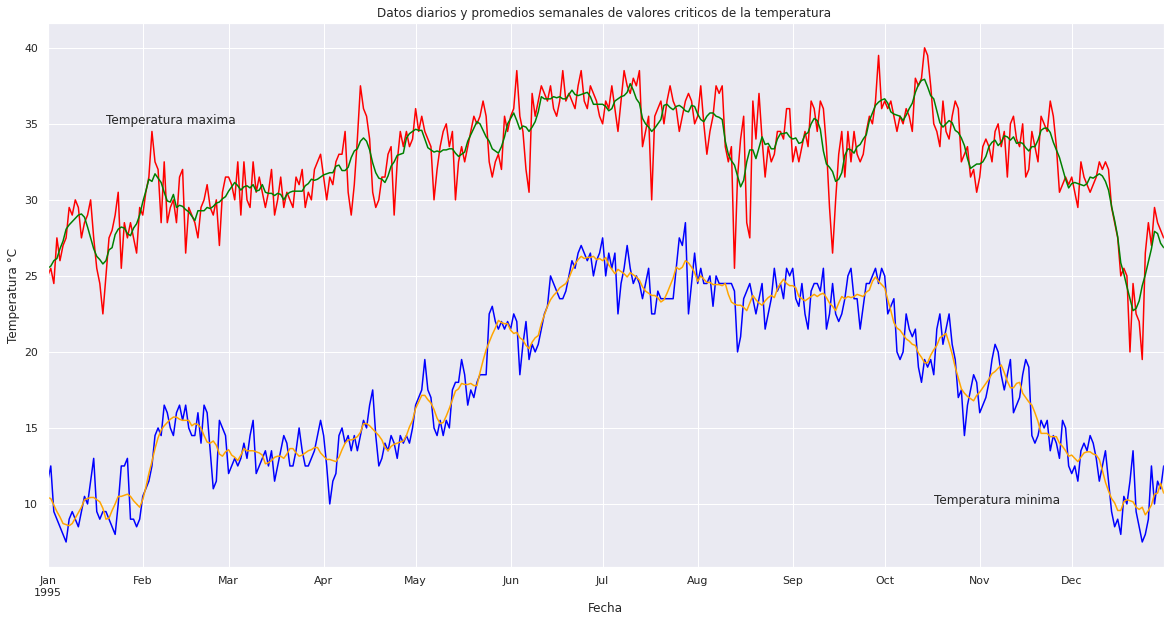

In [ ]:
#ACTIVIDAD 4
#Para un año de datos, contrastando los datos diarios con el promedio móvil de 7 y 30 días. 
#CREAMOS NUESTRO DATA FRAME CON LOS DAROS DEL PROMEDIO MOVIL
start, end= "1995-01", "1995-12"
colu=["Evap", "T_Max", "T_min"]
df_7=df_90[colu].rolling(7, center=True).mean()
df_30=df_90[colu].rolling(30, center=True).mean()
df_365=df_90[colu].rolling(365, center=True).mean()
#UNA VEZ CREADOS LOS GRAFIAMOS EN CONJUNTO A LOS DATOS DIRIOS
axes=df_90.loc[start:end, "T_Max"].plot(figsize=(20,10), linestyle="-", alpha=1, color="red")
axes=df_7.loc[start:end, "T_Max"].plot(linestyle="-", alpha=1, color="green")
axes=df_90.loc[start:end, "T_min"].plot(linestyle="-", alpha=1, color="blue")
axes=df_7.loc[start:end, "T_min"].plot(linestyle="-", alpha=1, color="orange")
plt.title("Datos diarios y promedios semanales de valores criticos de la temperatura ")
plt.ylabel("Temperatura °C")
plt.text(9150,35, "Temperatura maxima")
plt.text(9420,10, "Temperatura minima")
#podemos notar que el promedio movil semanal suaviza la grafica dejando que las variaciones en periodos cortos se supriman y dando mas informacion acerca de la tendencia de los valores ciritocs de la temperatura

Text(9420, 10, 'Temperatura minima')

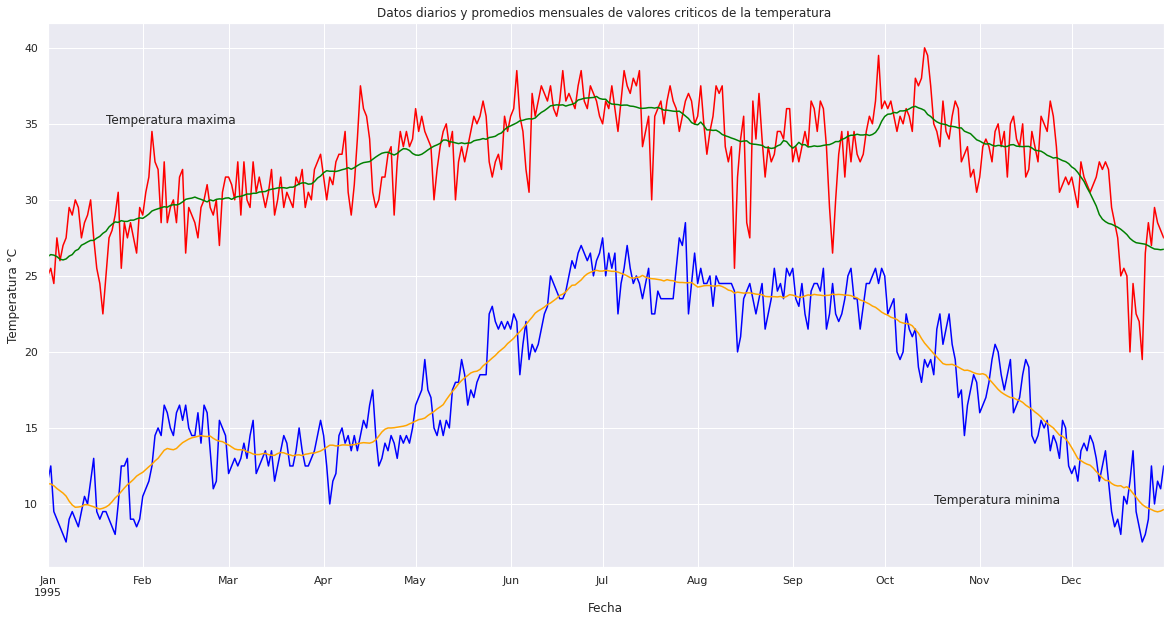

In [ ]:
#ACTIVIDAD 4
start, end= "1995-01", "1995-12"
axes=df_90.loc[start:end, "T_Max"].plot(figsize=(20,10), linestyle="-", alpha=1, color="red")
axes=df_30.loc[start:end, "T_Max"].plot(linestyle="-", alpha=1, color="green")
axes=df_90.loc[start:end, "T_min"].plot(linestyle="-", alpha=1, color="blue")
axes=df_30.loc[start:end, "T_min"].plot(linestyle="-", alpha=1, color="orange")
plt.title("Datos diarios y promedios mensuales de valores criticos de la temperatura ")
plt.ylabel("Temperatura °C")
plt.text(9150,35, "Temperatura maxima")
plt.text(9420,10, "Temperatura minima")
#es notorio como el promedio mensual suaviza aun mas nuestra distribucion de datos

Text(9420, 10, 'Temperatura minima')

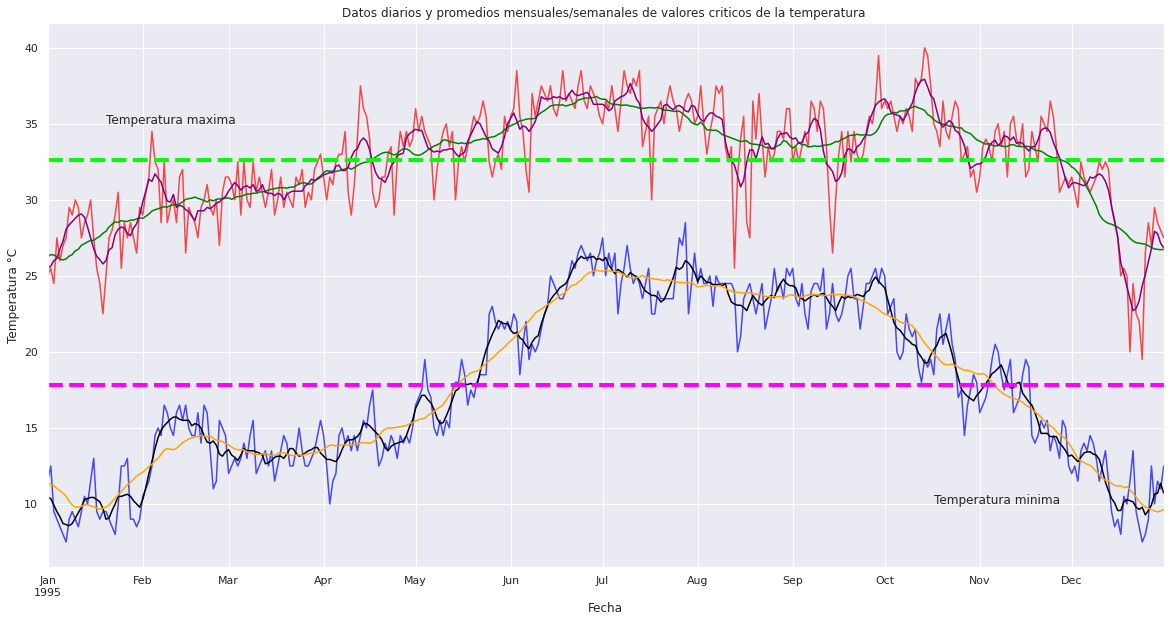

In [ ]:
#ACTIVIDAD 4
start, end= "1995-01", "1995-12"
axes=df_90.loc[start:end, "T_Max"].plot(figsize=(20,10), linestyle="-", alpha=0.7, color="red")
axes=df_30.loc[start:end, "T_Max"].plot(linestyle="-", alpha=1, color="green")
axes=df_90.loc[start:end, "T_min"].plot(linestyle="-", alpha=0.7, color="blue")
axes=df_7.loc[start:end, "T_Max"].plot(linestyle="-", alpha=1, color="purple")
axes=df_7.loc[start:end, "T_min"].plot(linestyle="-", alpha=1, color="black")
axes=df_30.loc[start:end, "T_min"].plot(linestyle="-", alpha=1, color="orange")
plt.axhline(df_90.loc[start:end, "T_Max"].mean(), color="lime", linestyle="--", linewidth=4)
plt.axhline(df_90.loc[start:end, "T_min"].mean(), color="magenta", linestyle="--", linewidth=4)
plt.title("Datos diarios y promedios mensuales/semanales de valores criticos de la temperatura ")
plt.ylabel("Temperatura °C")
plt.text(9150,35, "Temperatura maxima")
plt.text(9420,10, "Temperatura minima")
#AQUI AÑADIMOS EL PROMEDIO

Text(16000, 5, 'Temperatura minima')

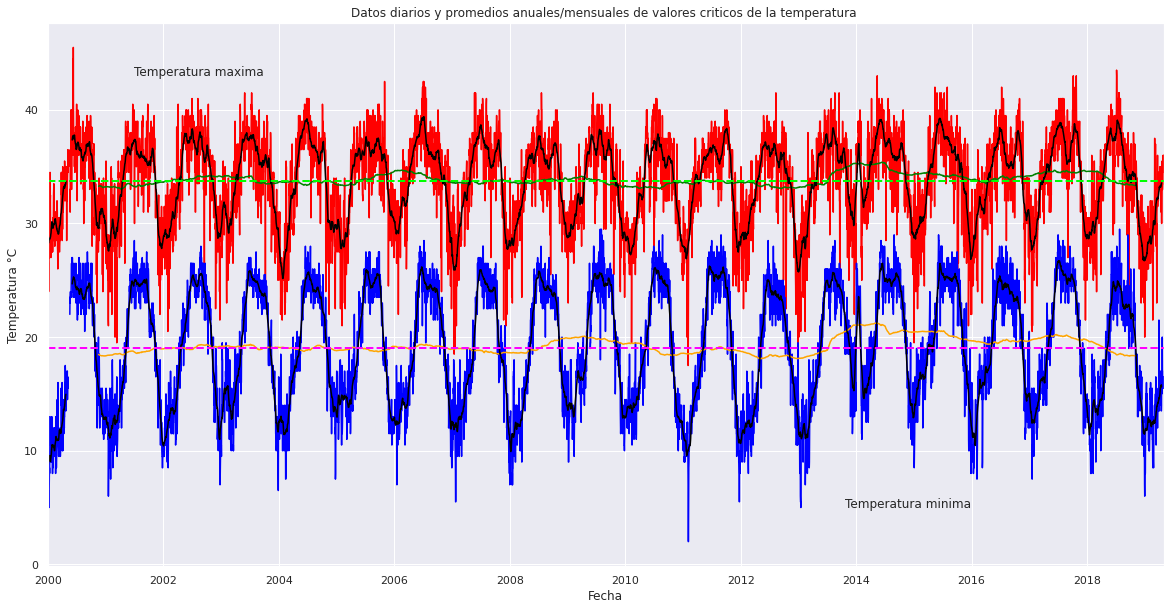

In [ ]:
#ACTIVIDA 4
#ahora compararemos los datos diarios de valores criticos de la temperatura con el promedio anual
start, end="2000-01","2020-01"
axes=df_90.loc[start:end, "T_Max"].plot(figsize=(20,10), linestyle="-", alpha=1, color="red")
axes=df_365.loc[start:end, "T_Max"].plot(linestyle="-", alpha=1, color="green")
axes=df_90.loc[start:end, "T_min"].plot(linestyle="-", alpha=1, color="blue")
axes=df_365.loc[start:end, "T_min"].plot(linestyle="-", alpha=1, color="orange")
axes=df_30.loc[start:end, "T_min"].plot(linestyle="-", alpha=1, color="black")
axes=df_30.loc[start:end, "T_Max"].plot(linestyle="-", alpha=1, color="black")
plt.axhline(df_90.loc[start:end, "T_Max"].mean(), color="lime", linestyle="--", linewidth=2)
plt.axhline(df_90.loc[start:end, "T_min"].mean(), color="magenta", linestyle="--", linewidth=2)

plt.title("Datos diarios y promedios anuales/mensuales de valores criticos de la temperatura ")
plt.ylabel("Temperatura °C")
plt.text(11500,43, "Temperatura maxima")
plt.text(16000,5, "Temperatura minima")


Text(0, 0.5, 'Evaporación (mm)')

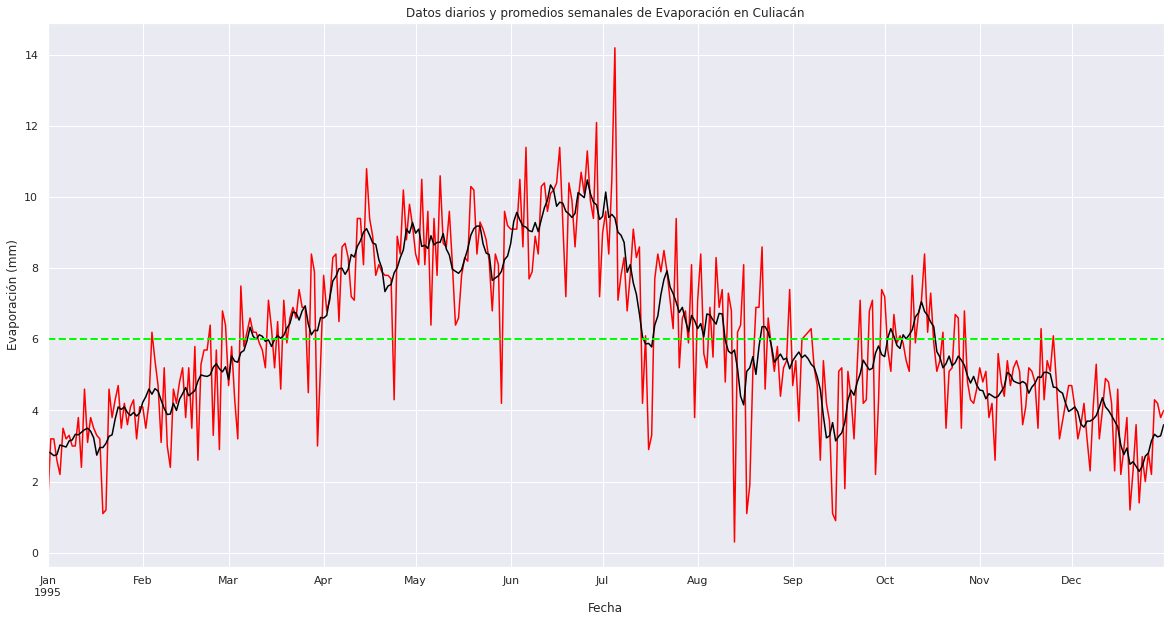

In [ ]:
#ACTIVIDAD 4
#ahora realizamos las comparaciones precvias con la variable de evaporacion
start, end= "1995-01", "1995-12"
axes=df_90.loc[start:end, "Evap"].plot(figsize=(20,10), linestyle="-", alpha=1, color="red")
axes=df_7.loc[start:end, "Evap"].plot(linestyle="-", alpha=1, color="black")
plt.axhline(df_90.loc[start:end, "Evap"].mean(), color="lime", linestyle="--", linewidth=2)
plt.title("Datos diarios y promedios semanales de Evaporación en Culiacán")
plt.ylabel("Evaporación (mm)")

Text(0, 0.5, 'Evaporación (mm)')

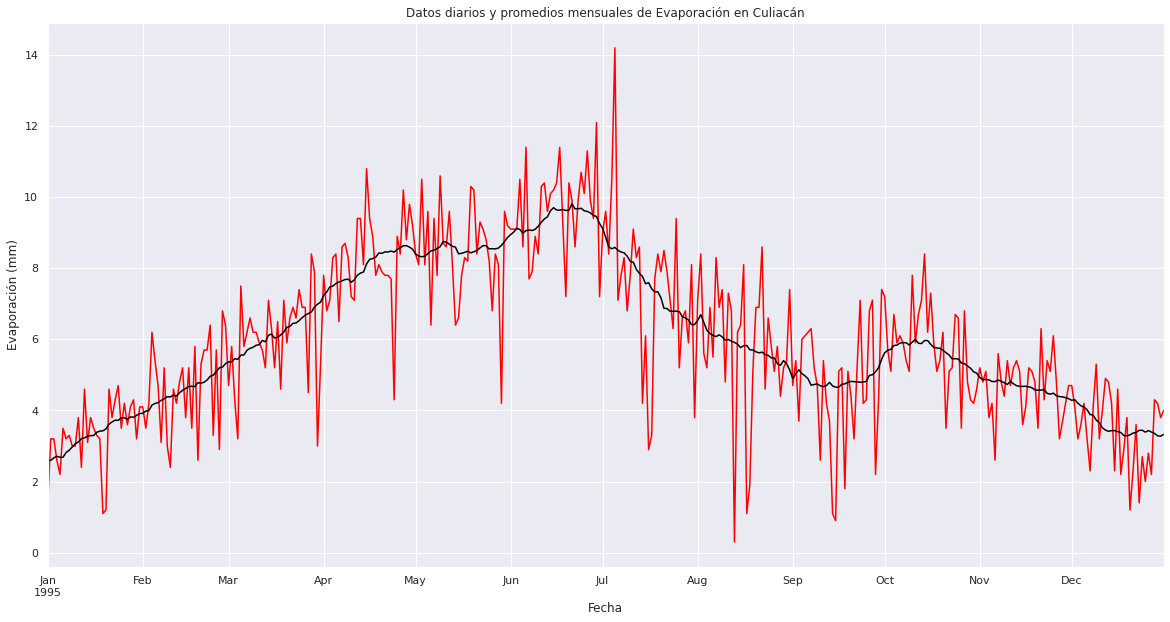

In [ ]:
#ACTIVIDAD 4 
start, end= "1995-01", "1995-12"
axes=df_90.loc[start:end, "Evap"].plot(figsize=(20,10), linestyle="-", alpha=1, color="red")
axes=df_30.loc[start:end, "Evap"].plot(linestyle="-", alpha=1, color="black")
plt.title("Datos diarios y promedios mensuales de Evaporación en Culiacán")
plt.ylabel("Evaporación (mm)")

Text(0, 0.5, 'Evaporación (mm)')

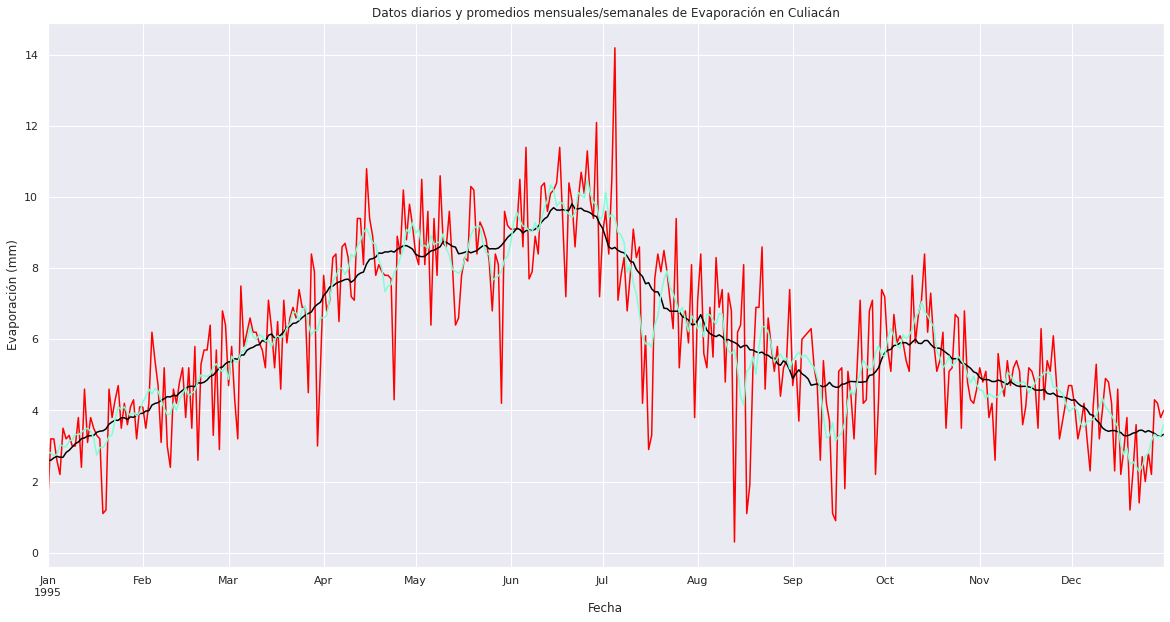

In [ ]:
#ACTIVIDAD 4 
start, end= "1995-01", "1995-12"
axes=df_90.loc[start:end, "Evap"].plot(figsize=(20,10), linestyle="-", alpha=1, color="red")
axes=df_30.loc[start:end, "Evap"].plot(linestyle="-", alpha=1, color="black")
axes=df_7.loc[start:end, "Evap"].plot(linestyle="-", alpha=1, color="aquamarine")
plt.title("Datos diarios y promedios mensuales/semanales de Evaporación en Culiacán")
plt.ylabel("Evaporación (mm)")

Text(0, 0.5, 'Evaporación (mm)')

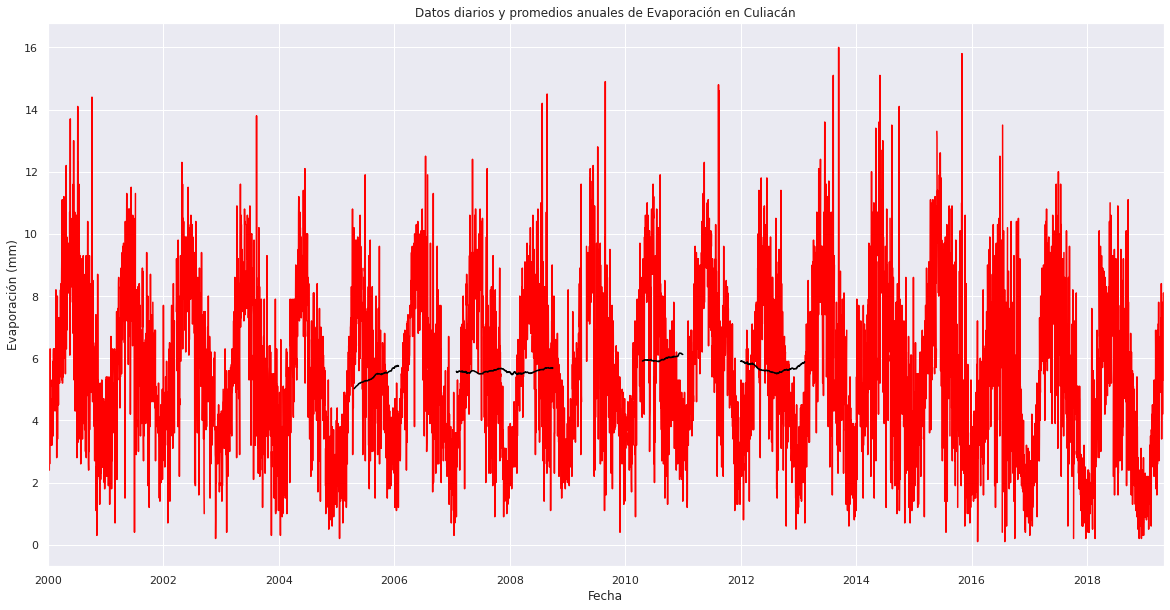

In [ ]:
#ACTIVIDAD 4
start, end="2000-01","2020-01"
axes=df_90.loc[start:end, "Evap"].plot(figsize=(20,10), linestyle="-", alpha=1, color="red")
axes=df_365.loc[start:end, "Evap"].plot(linestyle="-", alpha=1, color="black")
plt.title("Datos diarios y promedios anuales de Evaporación en Culiacán")
plt.ylabel("Evaporación (mm)")
#INTENTAREMOS ANALIZAR OTRO PERIODO YA QUE LE FALTAN MUCHOS DATOS DEL PROMEDIO ANUAL
#df_365.isnull().sum()


Text(0, 0.5, 'Evaporación (mm)')

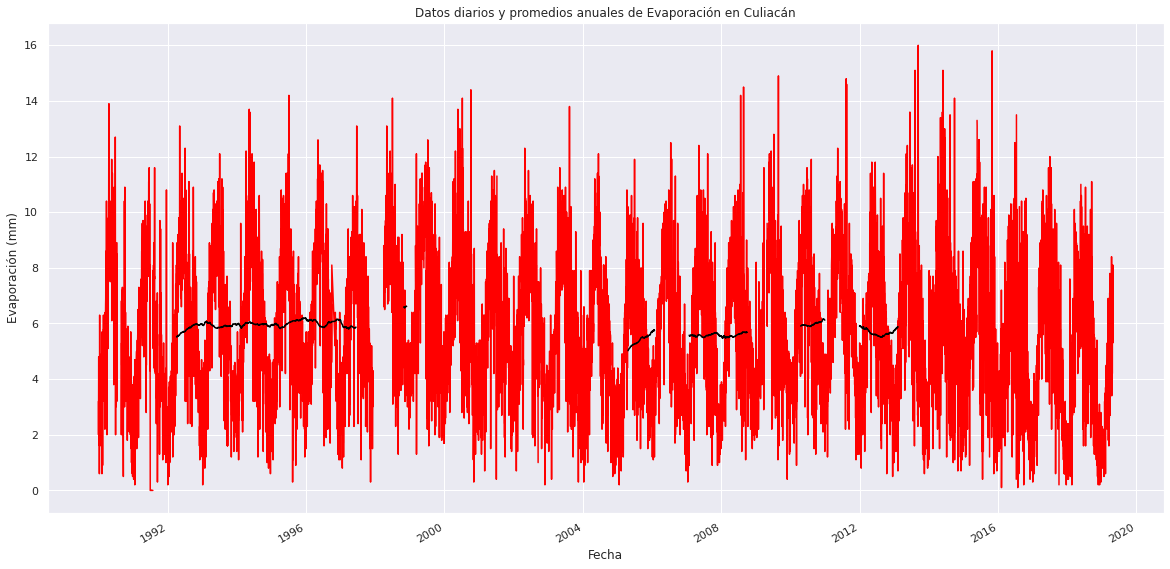

In [ ]:
#ACTIVIDAD 4
start, end="1990-01","2020-01"
axes=df_90.loc[start:end, "Evap"].plot(figsize=(20,10), linestyle="-", alpha=1, color="red")
axes=df_365.loc[start:end, "Evap"].plot(linestyle="-", alpha=1, color="black")
plt.title("Datos diarios y promedios anuales de Evaporación en Culiacán")
plt.ylabel("Evaporación (mm)")
#FALTAN MUCHOS DATOS, INTENTAREMOS USAR OTRO PROMEDIO

Text(0, 0.5, 'Evaporación (mm)')

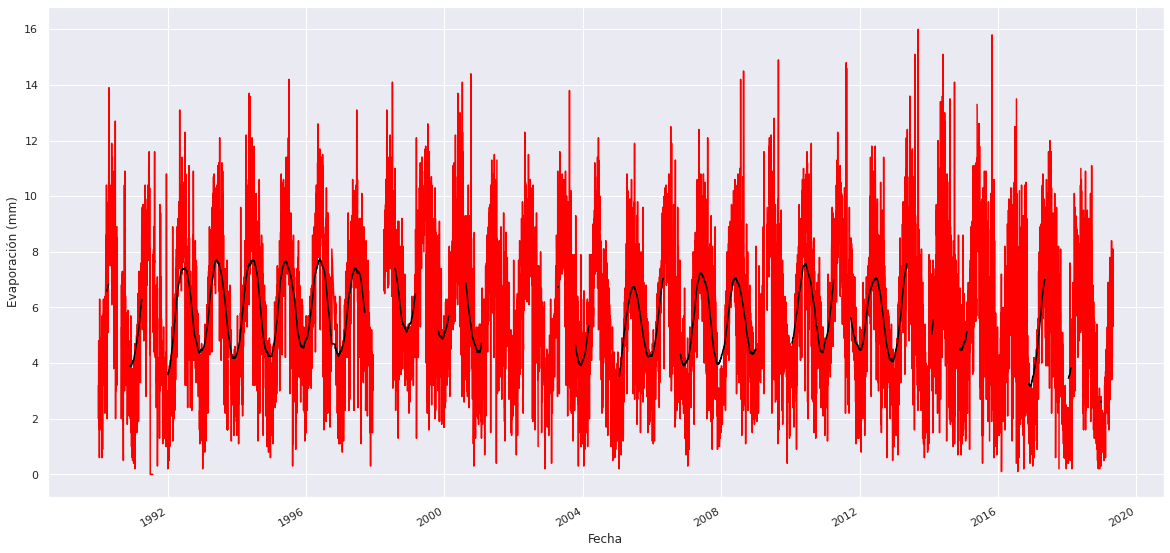

In [ ]:
#ACTIVIDAD 4
df_180=df_90[colu].rolling(180, center=True).mean()
start, end="1990-01","2020-01"
axes=df_90.loc[start:end, "Evap"].plot(figsize=(20,10), linestyle="-", alpha=1, color="red")
axes=df_180.loc[start:end, "Evap"].plot(linestyle="-", alpha=1, color="black")
plt.ylabel("Evaporación (mm)")
#podemos ver una periodicidad en la tendencia en la evaporacion, lamentablemente por la faltas de estos no es posible lograr obtener un promedio movil de una escala cercana al periodo de la tendencia a la evaporacion

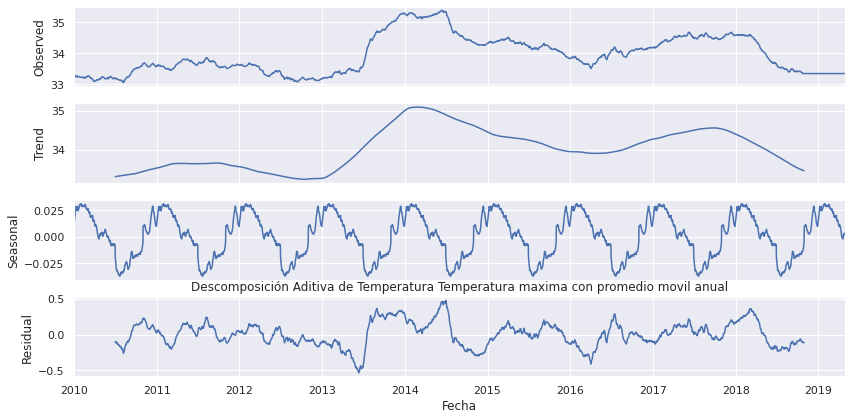

In [ ]:
#ACTIVIDAD 5
#hacemos la descomposición de la serie de tiempo, obs=tendencia+estacionalidad+residuo
start, end="2010-01","2020-01"
# Ciclo anual 365 días 
decompfreq = 365
#usamos statsmodel
rTmax = sm.tsa.seasonal_decompose(df_365.loc[start:end, 'T_Max'].interpolate(), freq=decompfreq, model='additive')
rTmax.plot()

plt.title('Descomposición Aditiva de Temperatura Temperatura maxima con promedio movil anual');

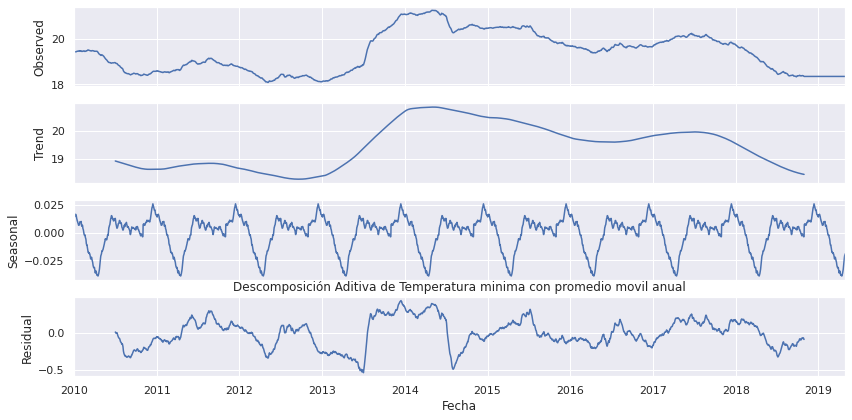

In [ ]:
#ACTIVIDAD 5
#descomponemos la serie de tiempo de la temperatura minima
start, end="2010-01","2020-01" 
decompfreq = 365
rTmin = sm.tsa.seasonal_decompose(df_365.loc[start:end, 'T_min'].interpolate(), freq=decompfreq, model='additive')
rTmin.plot()

plt.title('Descomposición Aditiva de Temperatura minima con promedio movil anual');

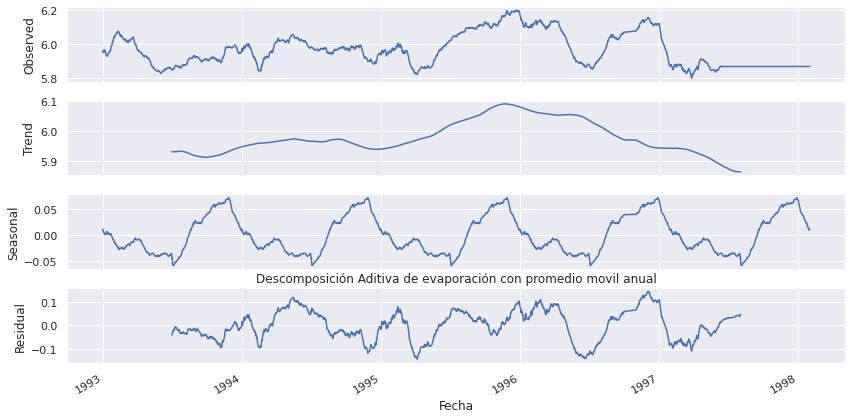

In [ ]:
#ACTIVIDAD 5
#Descomponemos la serie de tiempo de evaporacion al periodo mas largo con promedios moviles anuales
start, end="1993-01","1998-01"
# Ciclo anual 365 días 
decompfreq = 365
#usamos statsmodel
rEv = sm.tsa.seasonal_decompose(df_365.loc[start:end, 'Evap'].interpolate(), freq=decompfreq, model='additive')
rEv.plot()

plt.title('Descomposición Aditiva de evaporación con promedio movil anual');

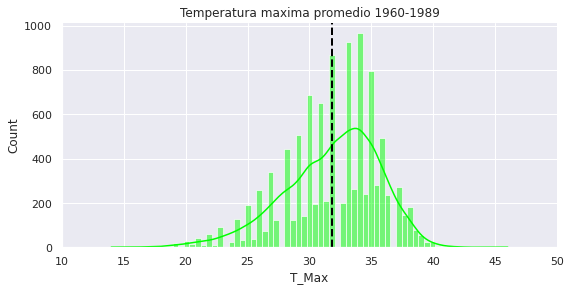

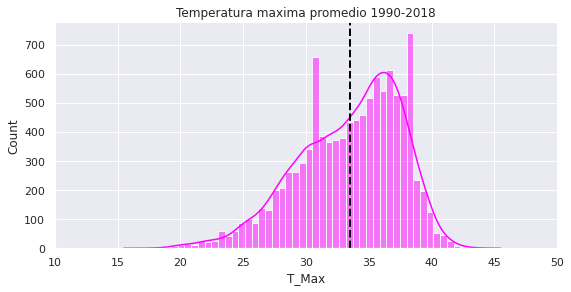

Temperatura maxima promedio 1960-1989 =  31.82926991360486 ºC
Temperatura maxima promedio 1990-2018 =  33.46636952237965 ºC
En promedio la temperatura maxima diaria ha subido 1.6370996087747898 ºC en Culiacán desde 1960


In [ ]:
#ACTIVIDAD 6
#compararemos histogramas de 2 periodos de 30 años 
p1= sns.displot(df_60.T_Max, kde=True, color='lime', height=4, aspect=2);
plt.axvline(df_60.T_Max.mean(), linestyle='--', linewidth=2, color='black');
p2= sns.displot(df_90.T_Max, kde=True, color="magenta", height=4, aspect=2);
plt.axvline(df_90.T_Max.mean(), linestyle='--', linewidth=2, color='black');
p1.set(title='Temperatura maxima promedio 1960-1989');
p2.set(title='Temperatura maxima promedio 1990-2018');
p1.set(xlim=(10,50))
p2.set(xlim=(10,50))
plt.show();
print('Temperatura maxima promedio 1960-1989 = ', df_60.T_Max.mean(), 'ºC' )
print('Temperatura maxima promedio 1990-2018 = ', df_90.T_Max.mean(), 'ºC' )
dt=df_90.T_Max.mean()-df_60.T_Max.mean()
print("En promedio la temperatura maxima diaria ha subido", dt,"ºC en Culiacán desde 1960")

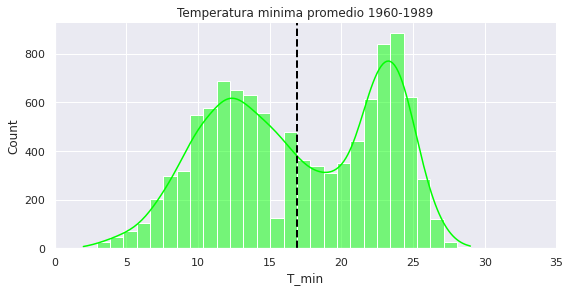

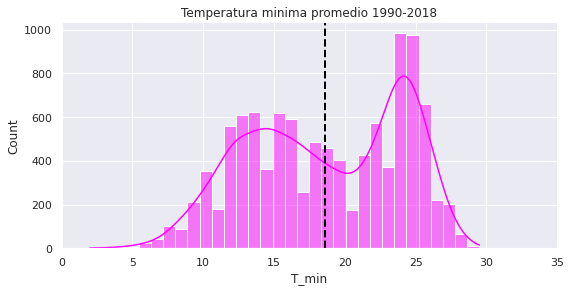

Temperatura minima promedio 1960-1989 =  16.939270100741304 ºC
Temperatura minima promedio 1990-2018 =  18.613202589847052 ºC
En promedio la temperatura minima ha subido 1.6739324891057485 ºC en Culiacán


In [ ]:
 #ACTIVIDAD 6
#compararemos histogramas de 2 periodos de 30 años 
p1= sns.displot(df_60.T_min, kde=True, color='lime', height=4, aspect=2);
plt.axvline(df_60.T_min.mean(), linestyle='--', linewidth=2, color='black');
p2= sns.displot(df_90.T_min, kde=True, color="magenta", height=4, aspect=2);
plt.axvline(df_90.T_min.mean(), linestyle='--', linewidth=2, color='black');
p1.set(title='Temperatura minima promedio 1960-1989');
p2.set(title='Temperatura minima promedio 1990-2018');
p1.set(xlim=(0,35))
p2.set(xlim=(0,35))
plt.show();
print('Temperatura minima promedio 1960-1989 = ', df_60.T_min.mean(), 'ºC' )
print('Temperatura minima promedio 1990-2018 = ', df_90.T_min.mean(), 'ºC' )
dt=df_90.T_min.mean()-df_60.T_min.mean()
print("En promedio la temperatura minima ha subido", dt,"ºC en Culiacán")
